In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'earthquake_data_tsunami.csv')
df.sample(3)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
467,6.8,5,6,719,445,0.000,13.0,79.0,-10.3750,161.2000,2011,4,0
21,6.6,6,5,762,0,0.914,94.0,27.0,11.5538,-86.9919,2022,4,1
395,6.8,0,3,711,131,0.000,18.0,602.2,18.7280,145.2880,2013,5,0


In [4]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [5]:
df.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

In [6]:
df.shape

(782, 13)

In [7]:
df.isna().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

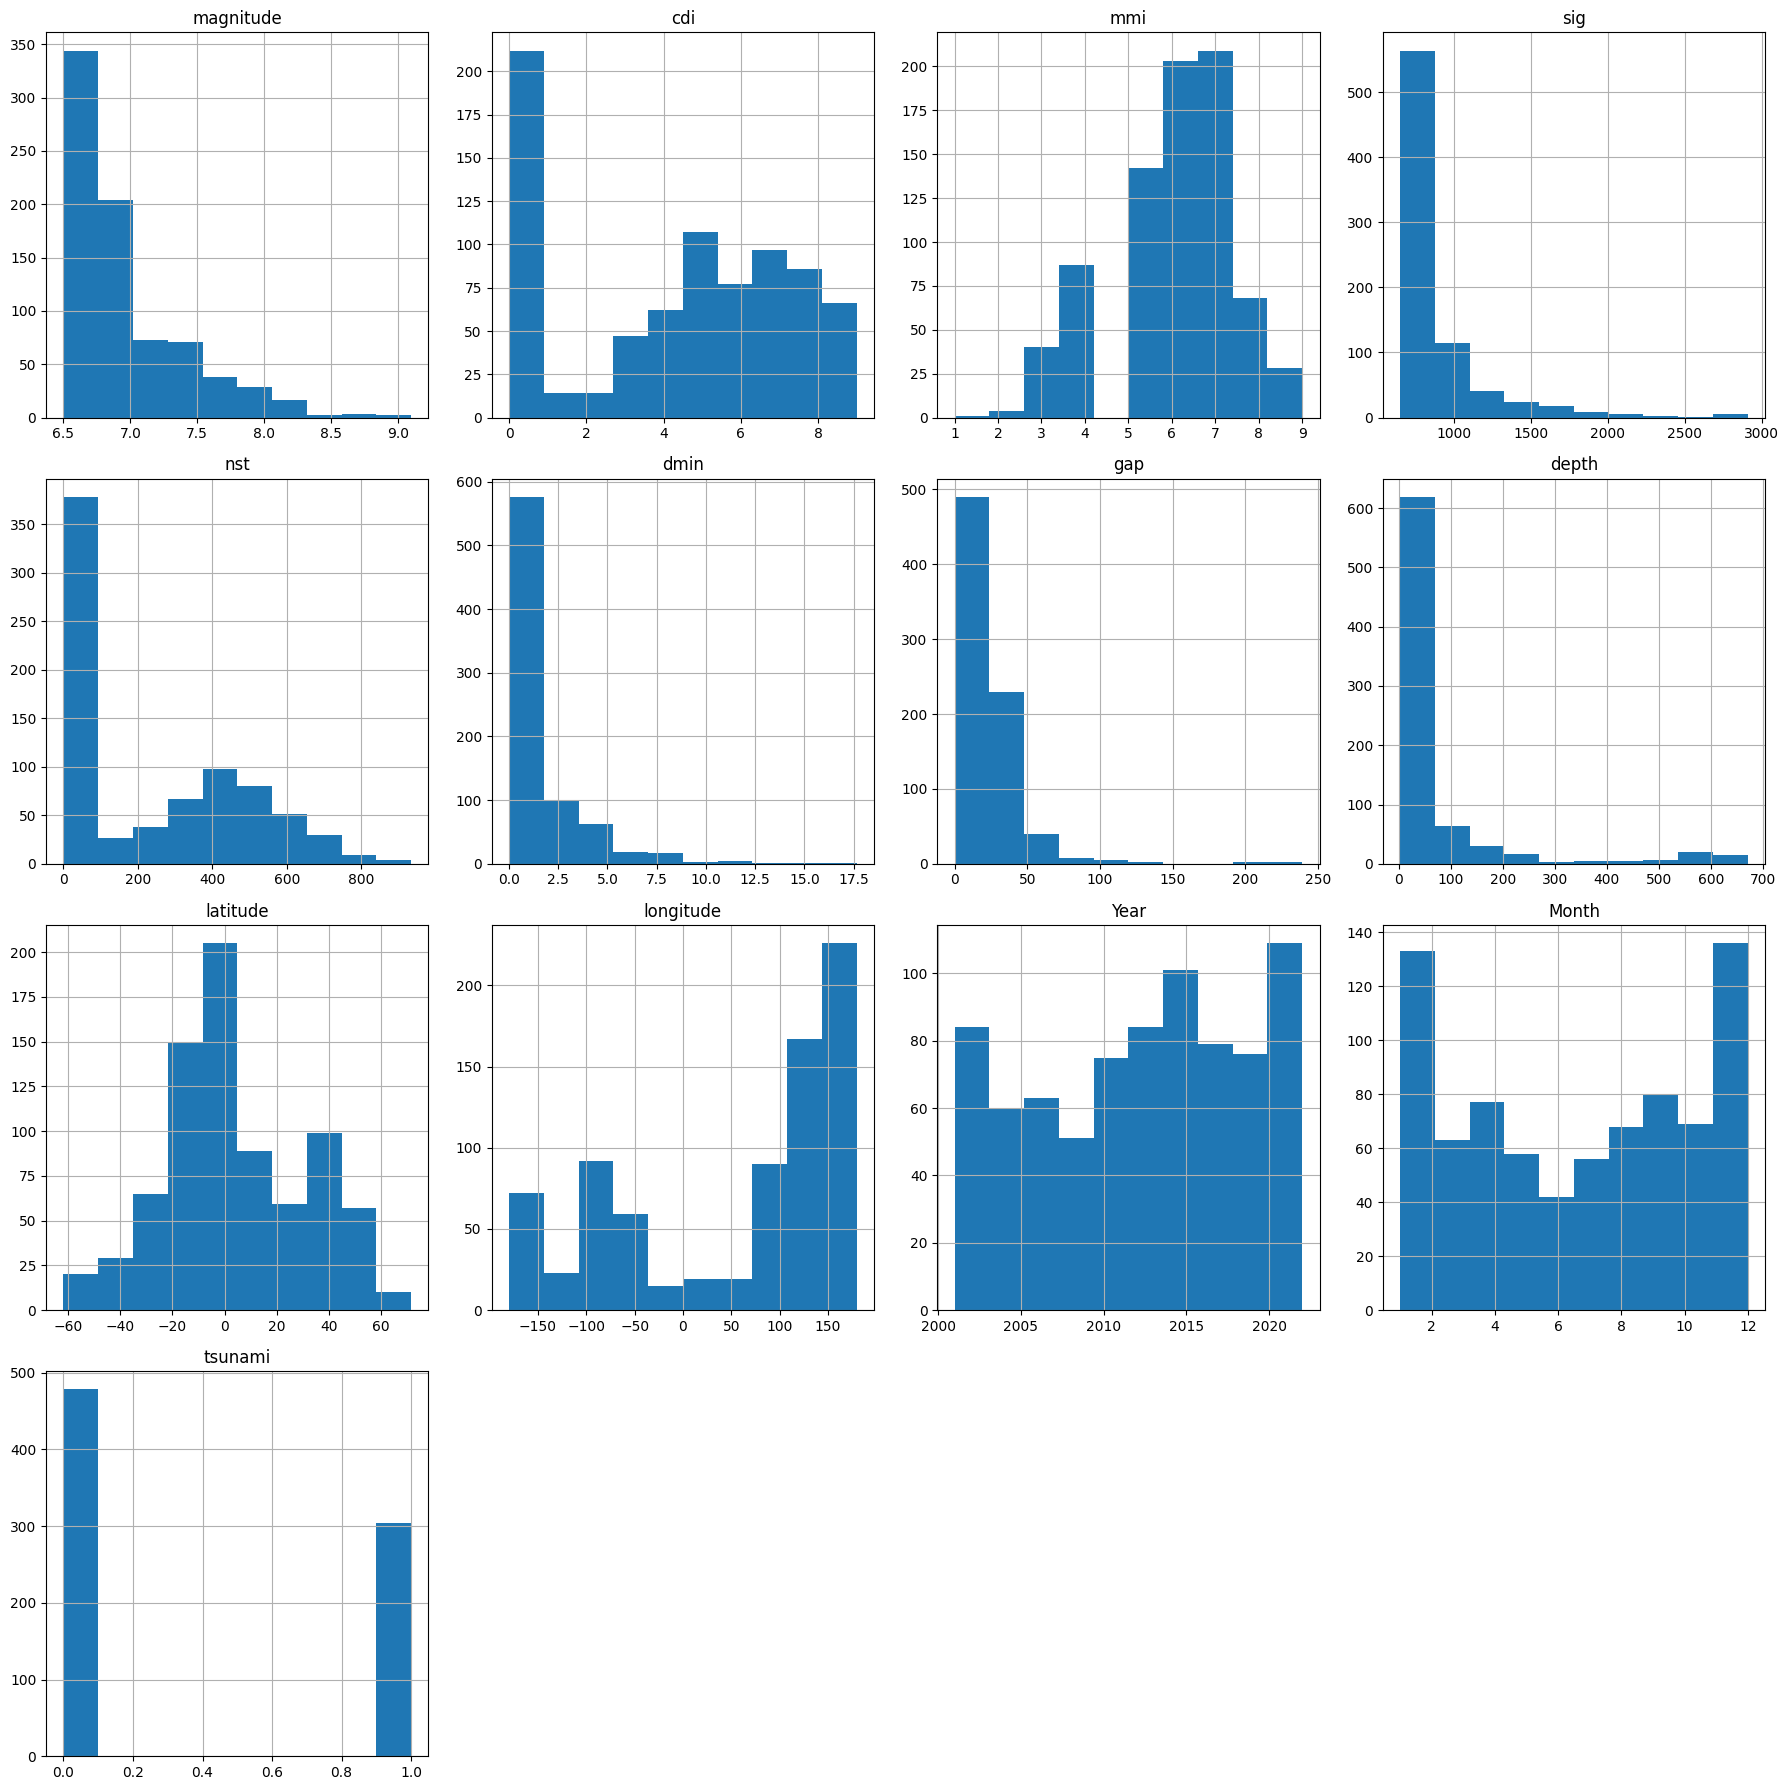

In [9]:
(1649, 22)
numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols].hist(figsize=(18, 18))
plt.tight_layout()
plt.show()

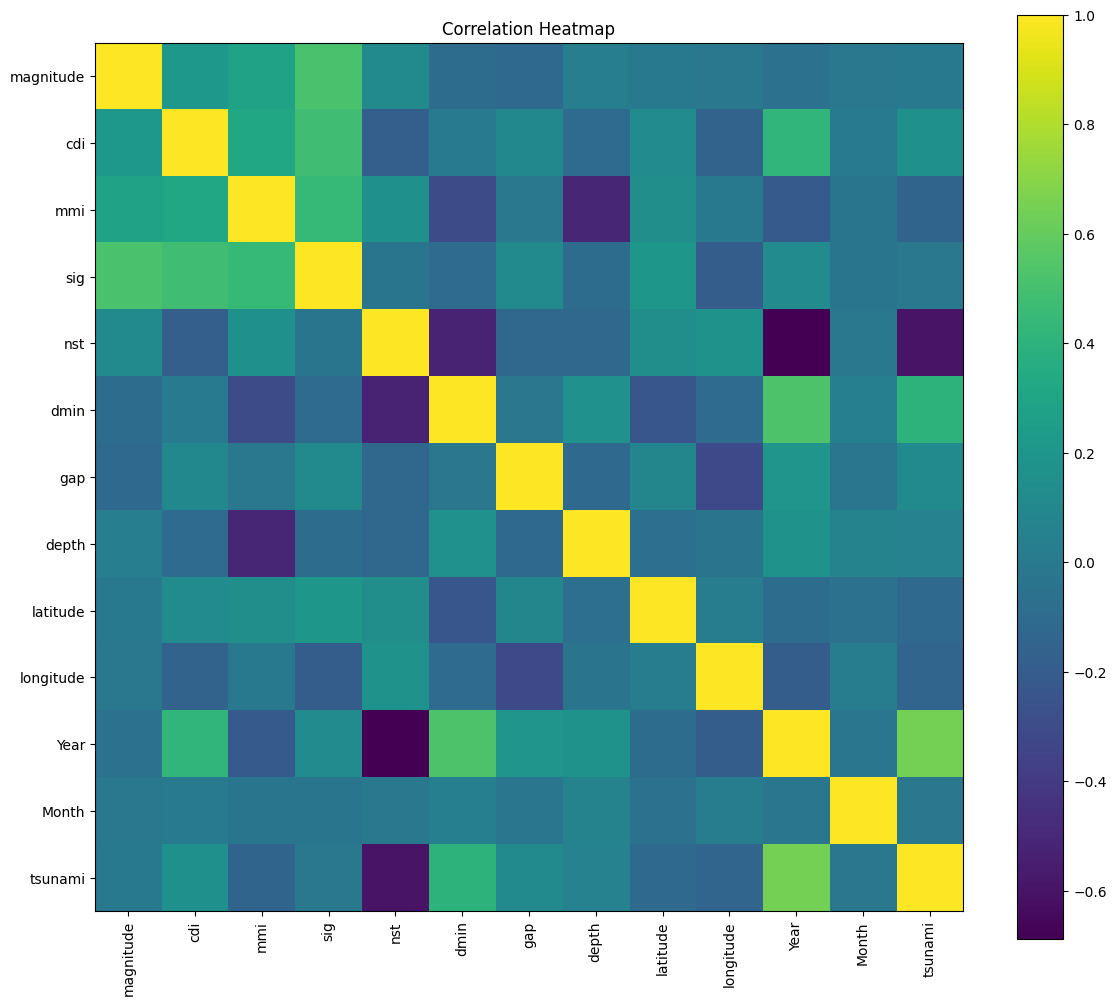

In [10]:
plt.figure(figsize=(14, 12))
plt.imshow(df[numeric_cols].corr(), interpolation="nearest")
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.show()

In [11]:
df.skew()

magnitude    1.444440
cdi         -0.197310
mmi         -0.250403
sig          3.083629
nst          0.533307
dmin         2.604580
gap          4.668607
depth        3.024869
latitude     0.200853
longitude   -0.702982
Year        -0.192450
Month       -0.067928
tsunami      0.457333
dtype: float64

In [12]:
import numpy as np

# Apply log(1 + x) to positive skewed features
df['magnitude'] = np.log1p(df['magnitude'])
df['sig']       = np.log1p(df['sig'])
df['dmin']      = np.log1p(df['dmin'])
df['gap']       = np.log1p(df['gap'])
df['depth']     = np.log1p(df['depth'])


In [13]:
x = df.drop(columns=["magnitude"])
y = df["magnitude"]

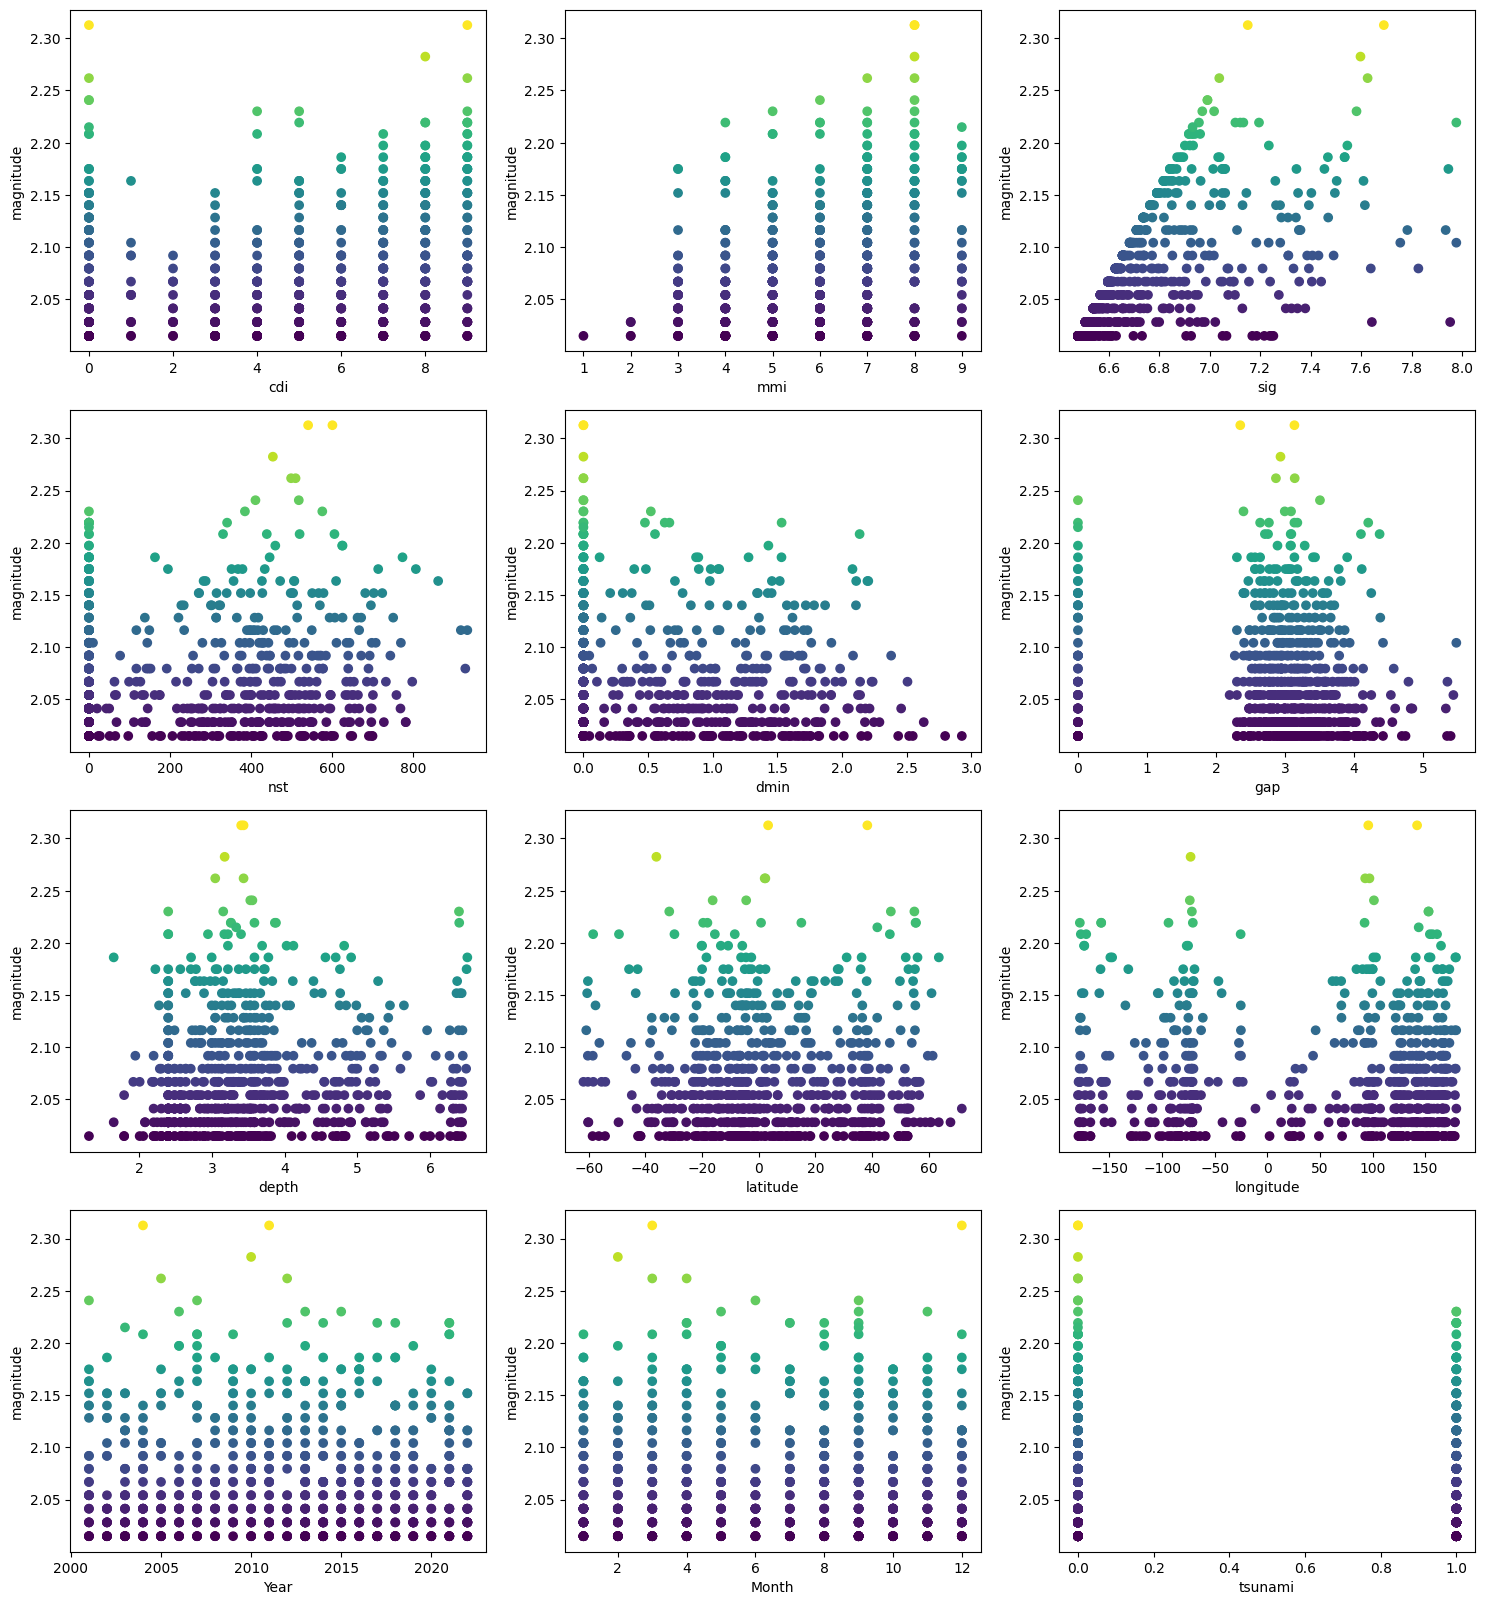

In [14]:
import matplotlib.pyplot as plt


n_features = len(x)
cols = 3  # number of subplots per row
rows = (n_features + cols - 1) // cols

plt.figure(figsize=(5*cols, 4*rows))
for i, feature in enumerate(x):
    plt.subplot(rows, cols, i+1)
    plt.scatter(df[feature], df['magnitude'], c=df['magnitude'], cmap='viridis')
    plt.xlabel(feature)
    plt.ylabel('magnitude')
plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import  LinearRegression,LassoCV,Ridge

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def score(x_train,x_test,y_train,y_test,y_pred,algo ):
    mse = mean_squared_error(y_test, y_pred)           
    mae = mean_absolute_error(y_test, y_pred)         
    r2 = r2_score(y_test, y_pred)                     
    train_score = round(algo.score(x_train, y_train), 2)
    test_score = round(algo.score(x_test, y_test), 2)
    print(f"Train score: {train_score}")
    print(f"Test score: {test_score}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared Score: {r2:.2f}")

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)
print(x_train.shape)
print(x_test.shape)

(547, 12)
(235, 12)


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)
x_train

array([[ 0.21800944, -0.6692242 ,  1.39073666, ...,  0.2877883 ,
        -1.01972949,  1.25222806],
       [-0.41969731,  0.01757812, -0.26829109, ...,  0.2877883 ,
         1.25581169,  1.25222806],
       [ 1.17456955,  1.39118276,  2.4294567 , ...,  1.11894035,
        -1.58861479,  1.25222806],
       ...,
       [ 0.85571618,  0.01757812,  1.26550286, ..., -0.04467252,
        -0.73528684, -0.79857658],
       [ 0.85571618,  1.39118276,  1.91013226, ...,  0.95270994,
        -0.4508442 ,  1.25222806],
       [ 0.85571618,  0.70438044, -0.11307859, ...,  1.11894035,
         0.1180411 ,  1.25222806]], shape=(547, 12))

In [20]:
param_grid = { 'n_neighbors':list(range(1,50))}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid,cv=5,scoring='r2')
grid.fit(x_train,y_train)
print(f"best K: {grid.best_params_}")
print(f"best score: {grid.best_score_}")

best K: {'n_neighbors': 5}
best score: 0.3205512432103019


In [21]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_test = np.expm1(y_test)
y_pred= np.expm1(y_pred)
score(x_train,x_test,y_train,y_test,y_pred,knn)

Train score: 0.58
Test score: -114.62
Mean Squared Error: 0.14
Mean Absolute Error: 0.26
R-squared Score: 0.32


In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [23]:
score(x_train,x_test,y_train,y_test,y_pred,reg)

Train score: 0.46
Test score: -114.31
Mean Squared Error: 23.46
Mean Absolute Error: 4.82
R-squared Score: -114.31


In [24]:
reg2 = LinearRegression()
cross_score = cross_val_score(reg2,x,y,cv=5)
cross_score


array([0.17734425, 0.30422876, 0.42434618, 0.42790374, 0.47018565])

In [25]:
lasso= LassoCV(cv=5,random_state=4)
lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)

In [26]:
score(x_train,x_test,y_train,y_test,y_pred,lasso)

Train score: 0.46
Test score: -114.31
Mean Squared Error: 23.46
Mean Absolute Error: 4.82
R-squared Score: -114.31


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,max_depth=5,random_state=4)
cv = cross_val_score(rf,x,y,cv=5)
print(cv)

[0.59192969 0.6020371  0.67980526 0.63967792 0.71936543]


In [28]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
score(x_train,x_test,y_train,y_test,y_pred,rf)

Train score: 0.83
Test score: -114.49
Mean Squared Error: 23.49
Mean Absolute Error: 4.83
R-squared Score: -114.49


In [29]:
from sklearn.svm import SVR

In [30]:
param_grid = {
    'C': [10, 50, 100, 200],
    'gamma': [0.01, 0.1, 0.5, 1],
    'epsilon': [0.01, 0.1, 0.5, 1]
}

grid = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

svr = grid.best_estimator_
y_pred = svr.predict(x_test)

print("Best parameters:", grid.best_params_)
score(x_train,x_test,y_train,y_test,y_pred,svr)

Best parameters: {'C': 10, 'epsilon': 0.01, 'gamma': 0.01}
Train score: 0.82
Test score: -114.47
Mean Squared Error: 23.49
Mean Absolute Error: 4.83
R-squared Score: -114.47
